### Data
- You only have information about the user first transaction on the site and based on that you
have to make your classification ("fraud/no fraud").
- An e-commerce site sells hand-made clothes.

### Tasks
- For each user, determine her country based on the numeric IP address.
Build a model to predict whether an activity is fraudulent or not. Explain how different
assumptions about the cost of false positives vs false negatives would impact the model.
- Your boss is a bit worried about using a model she doesn't understand for something as
important as fraud detection. How would you explain her how the model is making the
predictions? Not from a mathematical perspective (she couldn't care less about that), but
from a user perspective. What kinds of users are more likely to be classified as at risk?
What are their characteristics?
- Let's say you now have this model which can be used live to predict in real time if an
activity is fraudulent or not. From a product perspective, how would you use it? That is, what kind of different user experiences would you build based on the model output?

In [1]:
import pandas as pd

In [35]:
folder = "Data/04_identifying_fraudulent_activities"
fraud_df = pd.read_csv(f"{folder}/Fraud_Data.csv")
ip2country_df = pd.read_csv(f"{folder}/IpAddress_to_Country.csv")
#                             dtype={"lower_bound_ip_address": "Int64", "upper_bound_ip_address": "Int64"})

In [4]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [36]:
ip2country_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [7]:
print(fraud_df.shape)
print(ip2country_df.shape)

(151112, 11)
(138846, 3)


In [37]:
ip2country_tuple = tuple(ip2country_df.itertuples(index=False, name=None))
ip2country_tuple = sorted(ip2country_tuple, key=lambda row: row[1])

In [40]:
ip2country_df.describe()

,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


In [42]:
def binary_search(user_ip):

    left = 0
    right = len(ip2country_tuple) - 1

    while left <= right:

        mid = left + (right - left) // 2

        if ip2country_tuple[mid][0] <= user_ip <= ip2country_tuple[mid][1]:
            return mid

        elif user_ip > ip2country_tuple[mid][1]:
            left = mid + 1

        elif user_ip < ip2country_tuple[mid][0]:
            right = mid - 1
            
    return left

user_ips = fraud_df["ip_address"]
user_country = []

for i, user_ip in enumerate(user_ips):
    
    target = binary_search(user_ip)
    
    if target >= len(ip2country_tuple):
        user_country.append("Out of range")
        continue

#     print(user_ip, ip2country_tuple[target])
    user_country.append(ip2country_tuple[target][2])

In [43]:
fraud_df["country"] = user_country
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Out of range
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [44]:
fraud_df.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,United States
151111,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0,Out of range


### Sanity Check

- unique used_id
- signup time < purchase time
- unique device id? (What if two users use the same device)
- the distribution of `purchase_value`
- age
- ip out of range

In [55]:
columns = ["user_id", "device_id", "source", "browser", "sex", "country"]

for column in columns:
    
    column_set = set(fraud_df[column])
    print(column, len(column_set))

user_id 151112
device_id 137956
source 3
browser 5
sex 2
country 182


In [54]:
print("Check if there is any record whose signup time is after purchase time")
print(any(fraud_df["signup_time"] > fraud_df["purchase_time"]))

Check if there is any record whose signup time is after purchase time
False


In [72]:
fraud_df["delta_time"] = (pd.to_datetime(fraud_df["purchase_time"]) - pd.to_datetime(fraud_df["signup_time"])).dt.total_seconds()

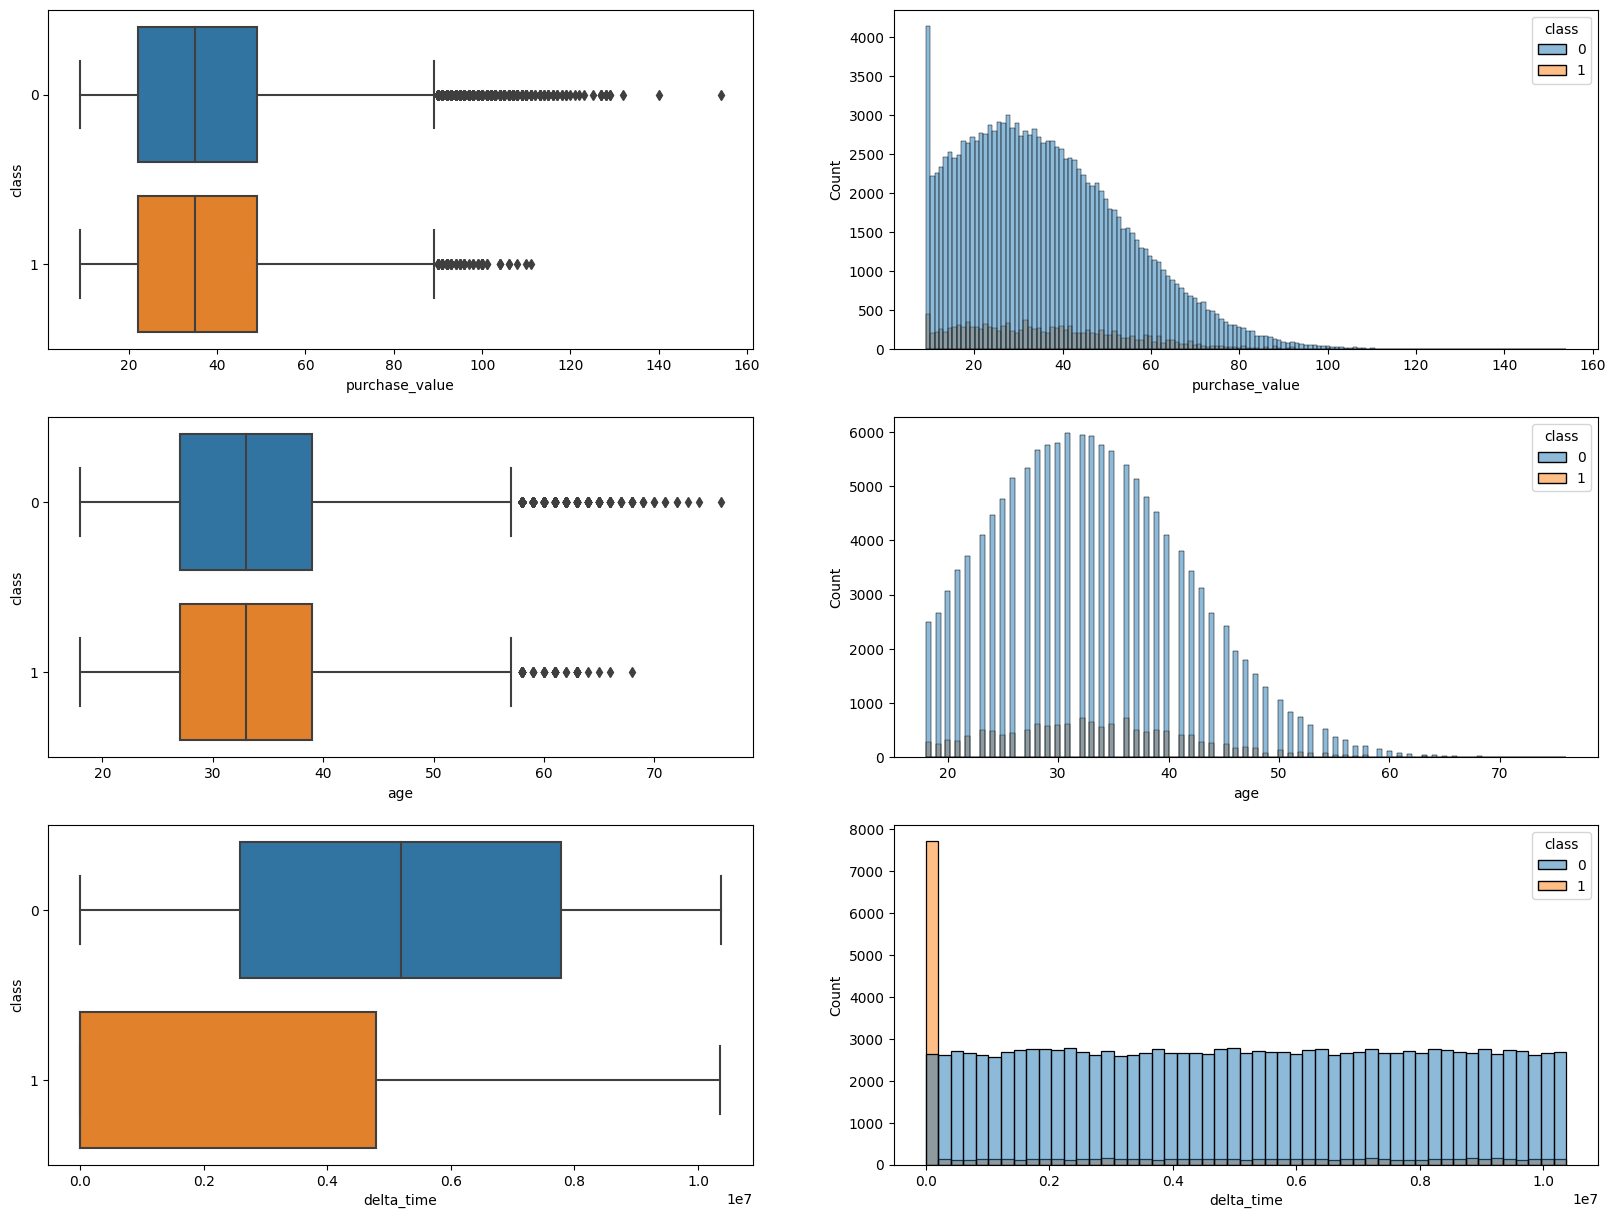

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_variables = ["purchase_value", "age", "delta_time"]

fig, axes = plt.subplots(3, 2, figsize=(20, 15))

for i in range(len(continuous_variables)):

    sns.boxplot(x=continuous_variables[i], y="class", data=fraud_df, ax=axes[i, 0], orient="h")
    sns.histplot(data=fraud_df, x=continuous_variables[i], ax=axes[i, 1], hue="class")

plt.show()

In [79]:
fraud_df.groupby("country").mean()["class"].sort_values()

country
Kyrgyzstan               0.000000
Maldives                 0.000000
Madagascar               0.000000
Macau                    0.000000
Liechtenstein            0.000000
                           ...   
Virgin Islands (U.S.)    0.333333
Luxembourg               0.388889
Sri Lanka                0.419355
Namibia                  0.434783
Turkmenistan             1.000000
Name: class, Length: 182, dtype: float64

In [83]:
columns = ["source", "browser", "sex"]

for column in columns:
    print(fraud_df.groupby(column).mean()["class"].sort_values())
    print()

source
SEO       0.089285
Ads       0.092066
Direct    0.105370
Name: class, dtype: float64

browser
IE         0.086775
Opera      0.089227
Safari     0.090201
FireFox    0.095165
Chrome     0.098792
Name: class, dtype: float64

sex
F    0.091007
M    0.095523
Name: class, dtype: float64



### Potentially important features

- country
- delta_time